In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
df=pd.read_csv('ab_data.csv')

In [2]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [3]:
df.groupby(['group','landing_page']).count()

user_id  timestamp  converted
group     landing_page                               
control   new_page         1928       1928       1928
          old_page       145274     145274     145274
treatment new_page       145311     145311     145311
          old_page         1965       1965       1965

In [10]:
df_cleaned=df.loc[(df['group']=='control') &(df['landing_page']=='old_page')|
                  (df['group']=='treatment') & (df['landing_page']=='new_page')]

In [11]:
df_cleaned.groupby(['group','landing_page']).count()

,,user_id,timestamp,converted
group,landing_page,,,
control,old_page,145274,145274,145274
treatment,new_page,145311,145311,145311


In [12]:
#checking for duplicate values
df_cleaned['user_id'].duplicated().sum()

1

In [14]:
# finding user_id for duplicate value
df_cleaned[df_cleaned.duplicated(['user_id'],keep=False)]['user_id']

1899    773192
2893    773192
Name: user_id, dtype: int64

In [15]:
df[df['user_id']==773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [16]:
df_cleaned=df_cleaned.drop_duplicates(subset='user_id',keep='first')

In [23]:
groups=df_cleaned.groupby(['group','landing_page','converted']).size()
display(groups)

group      landing_page  converted
control    old_page      0            127785
                         1             17489
treatment  new_page      0            128046
                         1             17264
dtype: int64

<AxesSubplot:xlabel='group,landing_page,converted'>

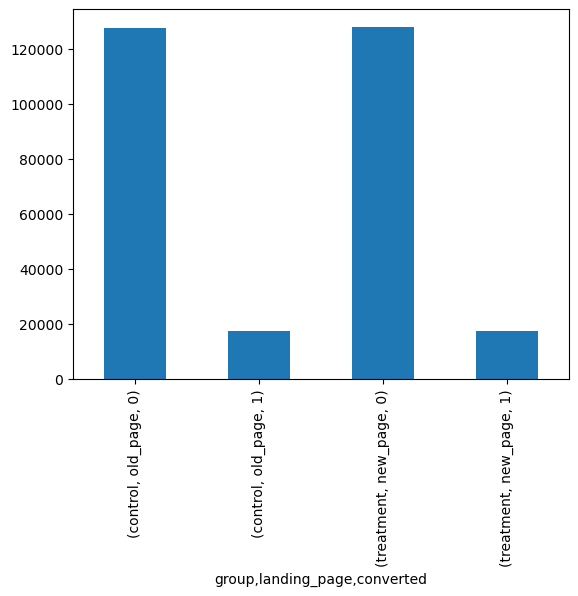

In [39]:
groups.plot.bar()

<AxesSubplot:ylabel='landing_page'>

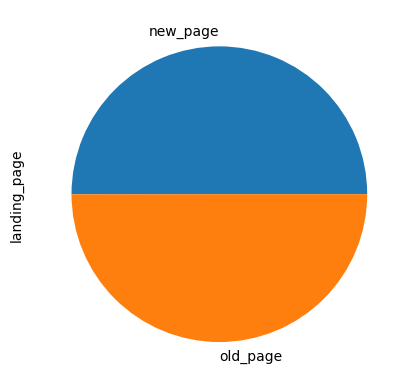

In [24]:
df_cleaned['landing_page'].value_counts().plot.pie()

In [25]:
## Re-arrange data into 2*2 for Chi-square
a=df_cleaned[df_cleaned['group']=='control']
b=df_cleaned[df_cleaned['group']=='treatment']

In [30]:
a_click=a.converted.sum()
b_click=b.converted.sum()

In [31]:
a_noclick=a.converted.size-a.converted.sum()
b_noclick=b.converted.size-b.converted.sum()

In [32]:
T=np.array([[a_click,a_noclick],[b_click,b_noclick]])

array([[ 17489, 127785],
       [ 17264, 128046]])

In [36]:
from scipy import stats
print(scipy.stats.chi2_contingency(T,correction=False)[1])

0.18988337448194853


Based on the p-value that was calculated to be 19% and assumpting a 5% level of significace, we cannot reject the Null Hypothesis and conclude that the different between the old page and the new page is the same

As a sanity check, I calculated the conversion rates between the two groups and the difference between them is minimal, which also reassures that this was conducted properly

In [37]:
a_CTR = a_click / (a_click + a_noclick)
b_CTR = b_click / (b_click + b_noclick)
print(a_CTR, b_CTR)

0.1203863045004612 0.11880806551510564
